In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.linalg import toeplitz
from scipy.special import sici

In [2]:
def get_acf(tau,f1,f2):
    s1,c1=sici(2*np.pi*f1*tau)
    s2,c2=sici(2*np.pi*f2*tau)
    y=c2-c1
    y=np.nan_to_num(y,nan=np.log(f2/f1)+1e-3)
    return y

In [65]:
f1=0.05
f2=0.5
N=2*1000
ps=np.zeros(N//2+1,dtype='complex128')
ps[int(f1*N):int(f2*N)+1]=N/np.arange(int(f1*N),int(f2*N)+1)/2 #N/2 is the scaling factor to line the two PS up.
acf_dft=np.fft.irfft(ps)
acf_anl=get_acf(np.arange(0,N//2),f1,f2)

/tmp/ipykernel_1236589/1336657683.py:4: RuntimeWarning: invalid value encountered in subtract
  y=c2-c1


In [86]:
np.sum(ps)

(2308.0933429107245+0j)

In [87]:
acf_anl[0]

2.303585092994046

(0.0, 100.0)

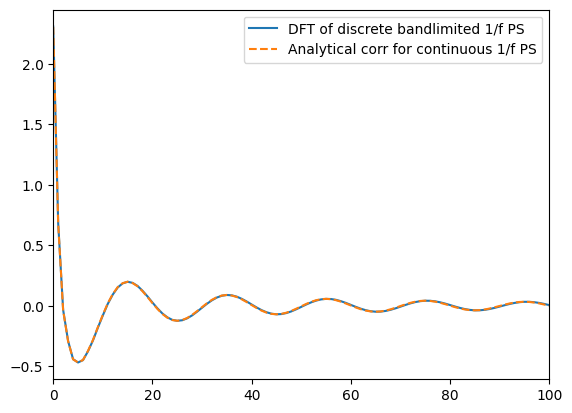

In [4]:
plt.plot(acf_dft, label='DFT of discrete bandlimited 1/f PS')
plt.plot(acf_anl,ls='--', label='Analytical corr for continuous 1/f PS')
plt.legend()
plt.xlim(0,100)

NameError: name 'noise' is not defined

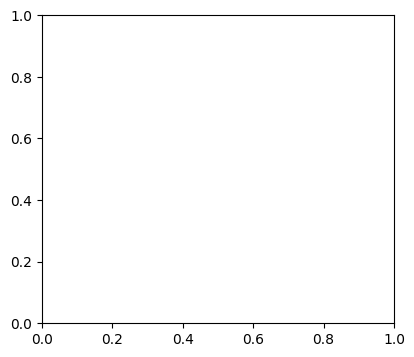

In [5]:
f=plt.gcf()
f.set_size_inches(10,4)
plt.subplot(121)
plt.plot(noise)
plt.subplot(122)
plt.loglog(np.abs(np.fft.rfft(noise))**2)
plt.plot(ps)
plt.ylim(1e-2,1e2)

In [73]:
N

2000

In [76]:
nlevels=1
nsamps=1000
bank=[]
for ll in range(nlevels):
    noise = np.fft.irfft(np.sqrt(ps/2) * (np.random.randn(N//2+1) + 1j * np.random.randn(N//2+1)))
    bank.append(noise[:nsamps].copy())

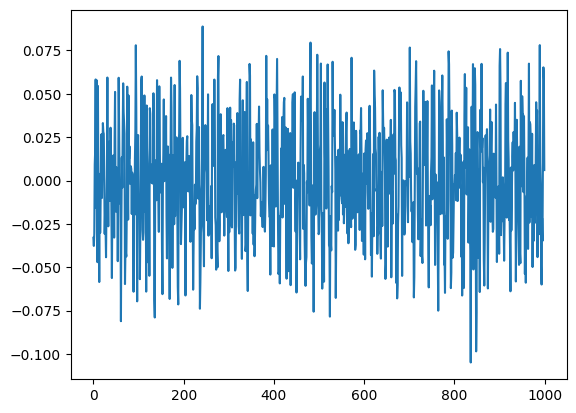

In [77]:
plt.plot(bank[i])

In [81]:
np.roll(bank[i],shift=-1)

array([-3.77212137e-02, -3.07367667e-02,  9.27315569e-03,  1.75127092e-02,
        5.82869713e-02, -1.57974190e-02,  5.79302628e-02, -2.93829967e-02,
       -4.71027216e-02,  5.45337633e-02, -2.75332772e-03, -1.17800507e-02,
       -5.85472474e-02,  3.82144345e-03, -3.01699774e-02, -1.23486810e-02,
        2.14247827e-02,  2.67473024e-02, -1.00627386e-02,  1.01430304e-02,
        3.31112949e-02,  2.80405851e-02,  2.69351304e-02,  5.05160017e-03,
       -3.07603774e-02, -1.74643277e-02, -2.83587139e-02, -4.42723662e-02,
       -1.40278329e-02,  3.50698076e-03,  5.93838128e-02, -7.87061431e-03,
       -2.64052214e-02,  1.04753412e-02,  2.23897264e-02,  1.99140397e-02,
       -1.17340696e-02,  3.04422258e-02,  1.50625848e-02, -1.67440172e-02,
       -5.62445183e-02, -1.09623090e-02, -3.37753748e-04,  1.44239557e-02,
        5.06679358e-03, -3.29214990e-02,  2.40669883e-02,  5.10860143e-02,
       -8.82948692e-03, -1.79465853e-02,  7.56777907e-03, -6.42414944e-04,
       -3.21637470e-03, -

In [80]:
bank[i]

array([-3.30324676e-02, -3.77212137e-02, -3.07367667e-02,  9.27315569e-03,
        1.75127092e-02,  5.82869713e-02, -1.57974190e-02,  5.79302628e-02,
       -2.93829967e-02, -4.71027216e-02,  5.45337633e-02, -2.75332772e-03,
       -1.17800507e-02, -5.85472474e-02,  3.82144345e-03, -3.01699774e-02,
       -1.23486810e-02,  2.14247827e-02,  2.67473024e-02, -1.00627386e-02,
        1.01430304e-02,  3.31112949e-02,  2.80405851e-02,  2.69351304e-02,
        5.05160017e-03, -3.07603774e-02, -1.74643277e-02, -2.83587139e-02,
       -4.42723662e-02, -1.40278329e-02,  3.50698076e-03,  5.93838128e-02,
       -7.87061431e-03, -2.64052214e-02,  1.04753412e-02,  2.23897264e-02,
        1.99140397e-02, -1.17340696e-02,  3.04422258e-02,  1.50625848e-02,
       -1.67440172e-02, -5.62445183e-02, -1.09623090e-02, -3.37753748e-04,
        1.44239557e-02,  5.06679358e-03, -3.29214990e-02,  2.40669883e-02,
        5.10860143e-02, -8.82948692e-03, -1.79465853e-02,  7.56777907e-03,
       -6.42414944e-04, -

In [68]:
nsamps=1000
acf_anl=get_acf(np.arange(0,nsamps),f1,f2)
C=toeplitz(acf_anl)
Cinv=np.linalg.inv(C)
vec=get_acf(np.arange(0,nsamps)+1,f1,f2)
vec=vec[::-1]
sigma = np.sqrt(C[0,0]-vec@Cinv@vec.T)
print(sigma)

/tmp/ipykernel_1236589/1336657683.py:4: RuntimeWarning: invalid value encountered in subtract
  y=c2-c1


0.9919123425726385


(0.0, 50.0)

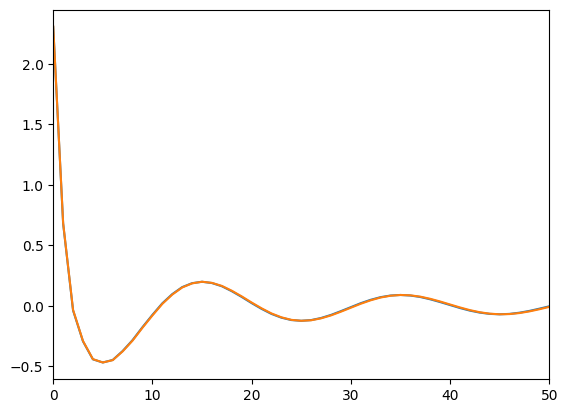

In [70]:
plt.plot(acf_anl)
plt.plot(acf_dft) #with more point dft will inch closer to analytical. with more point acf anl will decay down even more
plt.xlim(0,50)

In [7]:
npoints=1000
dtaus=np.arange(0,npoints+1)/npoints
coeff_arr = np.zeros((len(dtaus),nsamps))
my_tau = np.arange(0,nsamps)
dtaus[0]=1e-14

In [8]:
coeff_arr.shape

(1001, 1000)

In [9]:
for i,dtau in enumerate(dtaus):
    tau=my_tau+dtau
    vec=get_acf(tau,f1,f2)
    vec=vec[::-1]
    coeff=Cinv@vec
    coeff_arr[i,:]=coeff

In [10]:
u,s,vT=np.linalg.svd(coeff_arr)


In [11]:
maxs=10
svT = np.diag(s[:maxs])@vT[:maxs,:]

In [32]:
#first 5 significant singvals
polyord=8
legcoeffs=np.zeros((maxs,polyord+1),dtype='float64') # singvals x order of poly+1
for i in range(maxs):
    colnum=i
    legcoeffs[i,:]=np.linalg.pinv(np.polynomial.legendre.legvander(np.linspace(-1,1,1001),polyord))@u[:,colnum]

In [33]:
legcoeffs

array([[-2.71350725e-02, -2.80136100e-02,  9.00342923e-04,
         1.99874542e-03,  7.43865639e-06, -4.75486968e-05,
        -2.20772443e-07,  5.91934972e-07,  2.15048578e-09],
       [ 1.60497301e-02, -4.65899005e-02, -8.61622271e-03,
         3.84178768e-03,  3.30376791e-04, -1.05244046e-04,
        -5.38066664e-06,  1.42417204e-06,  4.96984356e-08],
       [-2.25901450e-03,  5.44218935e-03, -6.99412186e-02,
         1.71982490e-03,  3.64618651e-03, -1.85076197e-04,
        -7.26869140e-05,  3.98372384e-06,  7.68250154e-07],
       [-4.56759438e-05,  2.46191281e-03,  1.94490206e-03,
         8.31088376e-02,  5.09996524e-03, -2.68342314e-03,
        -1.07294506e-04,  3.81422024e-05,  1.01650711e-06],
       [ 5.56486247e-05,  1.74501058e-04, -2.17421241e-03,
         4.59649528e-03, -9.42202681e-02,  1.22249755e-03,
         3.00038378e-03, -6.26825405e-05, -3.95871387e-05],
       [ 7.15475740e-06, -2.92055525e-04, -1.29266456e-05,
         1.38011497e-03,  1.11472688e-03,  1.039222

In [34]:
uu=np.zeros(maxs,dtype='float64')
for i in range(maxs):
    uu[i]=np.polynomial.legendre.legval(2*1e-4 - 1,legcoeffs[i,:])
pred_coeff = uu@svT
tau=my_tau+1e-4
vec=get_acf(tau,f1,f2)
vec=vec[::-1]
actual_coeff=Cinv@vec

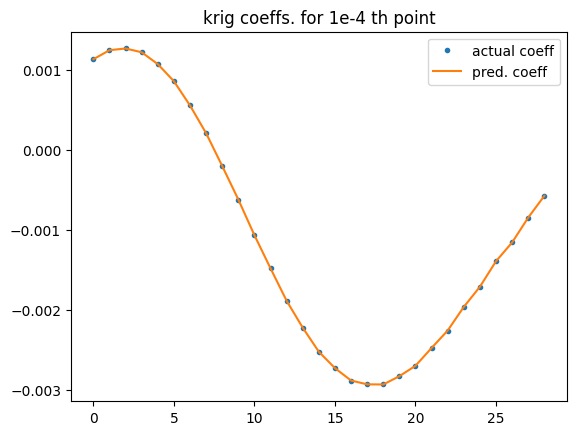

In [35]:
plt.title("krig coeffs. for 1e-4 th point")
plt.plot(actual_coeff[-30:-1],'.',label='actual coeff')
plt.plot(pred_coeff[-30:-1],label='pred. coeff')
plt.legend()

In [ ]:
def eval_coeffs(point,legcoeffs,svT):
    uu=np.zeros(maxs,dtype='float64')
    

In [83]:
nlevels=1
nsamps=N//2
ndata=2000
mult=10 #10x every level
fsamp=250e6
fbase=fsamp/mult**nlevels
spec = np.zeros(ndata)

for i in range(0,nlevels):
    # dt=mult**(i-nlevels)
    dt=1
    print(i)
    print("dt",dt)
    for j in range(ndata):
        #get contribution to every point from each level
        print("j",j)
         # pt number j/1e10
        pt = 1
        for k in range(maxs):
            uu[k]=np.polynomial.legendre.legval(2*(pt) - 1,legcoeffs[k,:])
        coeffs=uu@svT
        print(coeffs)
        pred=coeffs@bank[i]
        print(pred)
        #if integer multiple
        if (j*dt)%1==0.: #integers exactly rep. in floats
            #add noise
            pred+=np.random.randn(1)[0]*sigma
            bank[i]=np.roll(bank[i],-1)
            bank[i][-1]=pred
        spec[j]+=pred

0
dt 1
j 0
[-9.40185737e-04 -4.32092467e-04  7.16639711e-05  1.03668658e-03
  2.47013471e-03  4.47468810e-03  7.04319890e-03  1.01685327e-02
  1.37601246e-02  1.76977888e-02  2.17910815e-02  2.58200432e-02
  2.95190822e-02  3.26162496e-02  3.48327021e-02  3.59217012e-02
  3.56753482e-02  3.39592343e-02  3.07176374e-02  2.59976780e-02
  1.99450530e-02  1.28125049e-02  4.94125181e-03 -3.24786579e-03
 -1.12872087e-02 -1.86851162e-02 -2.49675364e-02 -2.97065207e-02
 -3.25610648e-02 -3.33003361e-02 -3.18328031e-02 -2.82137492e-02
 -2.26540690e-02 -1.55057268e-02 -7.24715051e-03  1.55301253e-03
  1.02697257e-02  1.82718765e-02  2.49645173e-02  2.98401741e-02
  3.25149985e-02  3.27664292e-02  3.05495620e-02  2.60097140e-02
  1.94707514e-02  1.14183900e-02  2.46083450e-03 -6.71210600e-03
 -1.53865825e-02 -2.28764661e-02 -2.85830254e-02 -3.20398958e-02
 -3.29571072e-02 -3.12428489e-02 -2.70182382e-02 -2.06062669e-02
 -1.25126431e-02 -3.38269144e-03  6.04541488e-03  1.50043592e-02
  2.27563139e-

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



j 799
[-9.40185737e-04 -4.32092467e-04  7.16639711e-05  1.03668658e-03
  2.47013471e-03  4.47468810e-03  7.04319890e-03  1.01685327e-02
  1.37601246e-02  1.76977888e-02  2.17910815e-02  2.58200432e-02
  2.95190822e-02  3.26162496e-02  3.48327021e-02  3.59217012e-02
  3.56753482e-02  3.39592343e-02  3.07176374e-02  2.59976780e-02
  1.99450530e-02  1.28125049e-02  4.94125181e-03 -3.24786579e-03
 -1.12872087e-02 -1.86851162e-02 -2.49675364e-02 -2.97065207e-02
 -3.25610648e-02 -3.33003361e-02 -3.18328031e-02 -2.82137492e-02
 -2.26540690e-02 -1.55057268e-02 -7.24715051e-03  1.55301253e-03
  1.02697257e-02  1.82718765e-02  2.49645173e-02  2.98401741e-02
  3.25149985e-02  3.27664292e-02  3.05495620e-02  2.60097140e-02
  1.94707514e-02  1.14183900e-02  2.46083450e-03 -6.71210600e-03
 -1.53865825e-02 -2.28764661e-02 -2.85830254e-02 -3.20398958e-02
 -3.29571072e-02 -3.12428489e-02 -2.70182382e-02 -2.06062669e-02
 -1.25126431e-02 -3.38269144e-03  6.04541488e-03  1.50043592e-02
  2.27563139e-02  2

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[-9.40185737e-04 -4.32092467e-04  7.16639711e-05  1.03668658e-03
  2.47013471e-03  4.47468810e-03  7.04319890e-03  1.01685327e-02
  1.37601246e-02  1.76977888e-02  2.17910815e-02  2.58200432e-02
  2.95190822e-02  3.26162496e-02  3.48327021e-02  3.59217012e-02
  3.56753482e-02  3.39592343e-02  3.07176374e-02  2.59976780e-02
  1.99450530e-02  1.28125049e-02  4.94125181e-03 -3.24786579e-03
 -1.12872087e-02 -1.86851162e-02 -2.49675364e-02 -2.97065207e-02
 -3.25610648e-02 -3.33003361e-02 -3.18328031e-02 -2.82137492e-02
 -2.26540690e-02 -1.55057268e-02 -7.24715051e-03  1.55301253e-03
  1.02697257e-02  1.82718765e-02  2.49645173e-02  2.98401741e-02
  3.25149985e-02  3.27664292e-02  3.05495620e-02  2.60097140e-02
  1.94707514e-02  1.14183900e-02  2.46083450e-03 -6.71210600e-03
 -1.53865825e-02 -2.28764661e-02 -2.85830254e-02 -3.20398958e-02
 -3.29571072e-02 -3.12428489e-02 -2.70182382e-02 -2.06062669e-02
 -1.25126431e-02 -3.38269144e-03  6.04541488e-03  1.50043592e-02
  2.27563139e-02  2.86584

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



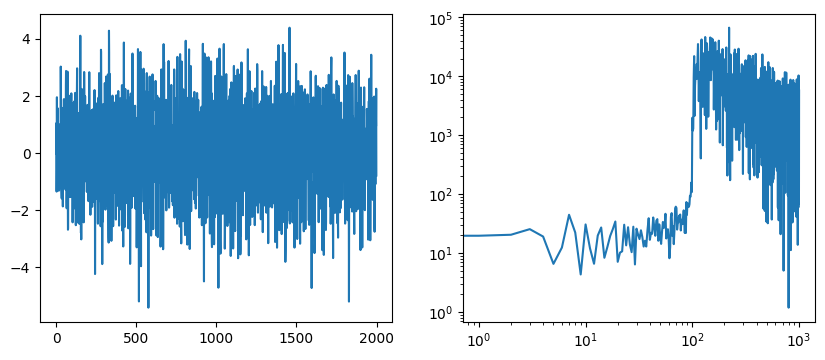

In [62]:
f=plt.gcf()
f.set_size_inches(10,4)
plt.subplot(121)
plt.plot(spec)
plt.subplot(122)
plt.loglog(np.abs(np.fft.rfft(spec))**2)
# plt.plot(ps)
# plt.ylim(1e-2,1e2)

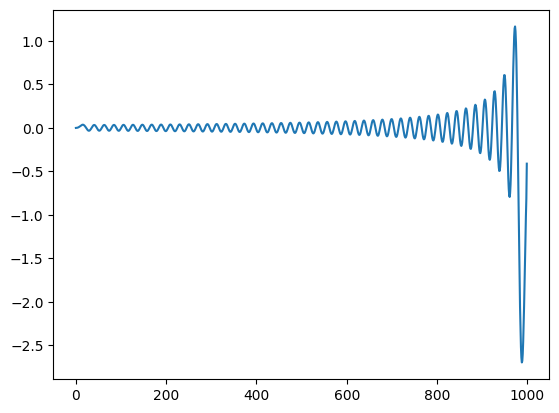

In [82]:
plt.plot(coeffs)

In [84]:
bank

[array([ 6.48752570e-01, -1.90447318e+00,  1.65985204e+00,  3.60180408e+00,
         6.85625749e-01,  1.04496828e+00, -6.20226035e-01,  2.46548095e+00,
         1.25651221e+00, -2.54585757e+00, -8.58187913e-01,  1.37686085e+00,
        -6.96536886e-01, -3.25277282e+00, -1.72115438e+00, -2.88242780e+00,
         3.31177004e-01, -3.17461193e-01,  2.50049143e+00,  3.13725543e+00,
         1.47673814e+00,  1.05483470e+00,  2.31441723e+00, -1.71440879e-01,
        -2.10502347e-01, -9.61891531e-01, -1.22620152e+00, -1.92629384e+00,
        -1.69405034e+00, -1.13682522e+00, -9.67735360e-01,  3.99702530e-01,
        -3.89352266e-01,  7.77334549e-01, -4.24933538e-01,  1.75960829e+00,
         2.62944193e+00,  6.98125937e-01,  2.30222808e+00, -6.17186096e-01,
        -1.50216380e+00, -1.21026208e+00,  2.34245109e-01, -2.24684965e-01,
        -1.01728849e+00, -3.15257963e+00, -1.79691467e-01,  1.98896823e+00,
         1.18190356e+00,  1.19000796e+00, -6.19767672e-03, -6.42766928e-01,
        -1.0

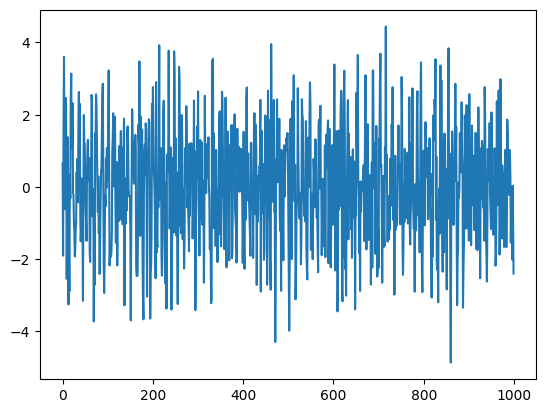

In [85]:
plt.plot(bank[0])